
# Setup


## Download the required libraries

In [ ]:
import sys

print( sys.executable )

!"{sys.executable}" -u -m pip install numpy
!"{sys.executable}" -u -m pip install pandas
!"{sys.executable}" -u -m pip install matplotlib
!"{sys.executable}" -u -m pip install tabulate


/usr/bin/python3



## Import the required libraries


In [ ]:
import numpy as numpy
import pandas as pandas
import matplotlib.pyplot as plt

from IPython.display import HTML, display
import tabulate



## Define Useful Function

In [6]:
from typing import Dict, List, Set
def displayAsTable( lst: list[list] ) -> None:
    display(
        HTML(
            tabulate.tabulate(lst, tablefmt='html')
        )
    )


TypeError: ignored


# Exploratory Data Analysis


## Load the datasets and combine them into one

These data sets exist in four separate files USDA website only lets us download a maximum number of rows of 50,000 per file.

In [ ]:
############################## only for google colab #################################
from google.colab import drive
drive.mount("/content/drive")
######################################################################################
#df_1 = pandas.read_csv (r'data/CropYields-1909-1939.csv')
#df_2 = pandas.read_csv (r'data/CropYields-1940-1969.csv')
#df_3 = pandas.read_csv (r'data/CropYields-1970-1989.csv')
#df_4 = pandas.read_csv (r'data/CropYields-1990-2007.csv')

df_1 = pandas.read_csv (r'/content/drive/My Drive/CMPS276/data/CropYields-1909-1939.csv')
df_2 = pandas.read_csv (r'/content/drive/My Drive/CMPS276/data/CropYields-1940-1969.csv')
df_3 = pandas.read_csv (r'/content/drive/My Drive/CMPS276/data/CropYields-1970-1989.csv')
df_4 = pandas.read_csv (r'/content/drive/My Drive/CMPS276/data/CropYields-1990-2007.csv')
df = pandas.concat([df_1, df_2, df_3, df_4])



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



## We take a look at the column names and the first couple of rows


In [ ]:
df.head()

,Program,Year,Period,Week Ending,Geo Level,State,State ANSI,Ag District,Ag District Code,County,...,Zip Code,Region,watershed_code,Watershed,Commodity,Data Item,Domain,Domain Category,Value,CV (%)
0,SURVEY,1939,YEAR,NaN,COUNTY,COLORADO,8,EAST CENTRAL,60,ADAMS,...,NaN,NaN,0,NaN,WHEAT,"WHEAT - YIELD, MEASURED IN BU / ACRE",TOTAL,NOT SPECIFIED,11.5,NaN
1,SURVEY,1939,YEAR,NaN,COUNTY,COLORADO,8,EAST CENTRAL,60,ARAPAHOE,...,NaN,NaN,0,NaN,WHEAT,"WHEAT - YIELD, MEASURED IN BU / ACRE",TOTAL,NOT SPECIFIED,10.0,NaN
2,SURVEY,1939,YEAR,NaN,COUNTY,COLORADO,8,EAST CENTRAL,60,CHEYENNE,...,NaN,NaN,0,NaN,WHEAT,"WHEAT - YIELD, MEASURED IN BU / ACRE",TOTAL,NOT SPECIFIED,5.0,NaN
3,SURVEY,1939,YEAR,NaN,COUNTY,COLORADO,8,EAST CENTRAL,60,DOUGLAS,...,NaN,NaN,0,NaN,WHEAT,"WHEAT - YIELD, MEASURED IN BU / ACRE",TOTAL,NOT SPECIFIED,14.0,NaN
4,SURVEY,1939,YEAR,NaN,COUNTY,COLORADO,8,EAST CENTRAL,60,EL PASO,...,NaN,NaN,0,NaN,WHEAT,"WHEAT - YIELD, MEASURED IN BU / ACRE",TOTAL,NOT SPECIFIED,8.0,NaN



We can see that there seems to be meta-data about this data set, as well as some missing data.

We therefore choose to look at the unique values in each column.



## We take a look at the unique values in each column


### Global Analysis of Columns

In [ ]:

for col in df:
    print(col + ": ", df[col].unique())
    print("-------------------------------------------------------------------------------------------")


Program:  ['SURVEY']
-------------------------------------------------------------------------------------------
Year:  [1939 1938 1937 1936 1935 1934 1933 1932 1931 1930 1929 1928 1927 1926
 1925 1924 1923 1922 1921 1920 1919 1918 1909 1969 1968 1967 1966 1965
 1964 1963 1962 1961 1960 1959 1958 1957 1956 1955 1954 1953 1952 1951
 1950 1949 1948 1947 1946 1945 1944 1943 1942 1941 1940 1989 1988 1987
 1986 1985 1984 1983 1982 1981 1980 1979 1978 1977 1976 1975 1974 1973
 1972 1971 1970 2007 2006 2005 2004 2003 2002 2001 2000 1999 1998 1997
 1996 1995 1994 1993 1992 1991 1990]
-------------------------------------------------------------------------------------------
Period:  ['YEAR']
-------------------------------------------------------------------------------------------
Week Ending:  [nan]
-------------------------------------------------------------------------------------------
Geo Level:  ['COUNTY']
--------------------------------------------------------------------------------


As can be seen some columns only hold meta-data about this dataset. These columns are are: Program, Period, Geo Level, Commodity, Data Item, Domain, and Domain Category.

We propose to drop them.


In [ ]:
df = df.drop(columns=['Program', 'Period', 'Geo Level', 'Commodity', 'Data Item', 'Domain', 'Domain Category'])


Also it is not clear what the CV (%) column is about, and the data within it is all NaN.

Therfore, we also chose to drop this column.


In [ ]:
df = df.drop(columns=['CV (%)'])

We can now start to take a look at each column in more details

In [ ]:
df.head()

,Year,Week Ending,State,State ANSI,Ag District,Ag District Code,County,County ANSI,Zip Code,Region,watershed_code,Watershed,Value
0,1939,NaN,COLORADO,8,EAST CENTRAL,60,ADAMS,1.0,NaN,NaN,0,NaN,11.5
1,1939,NaN,COLORADO,8,EAST CENTRAL,60,ARAPAHOE,5.0,NaN,NaN,0,NaN,10.0
2,1939,NaN,COLORADO,8,EAST CENTRAL,60,CHEYENNE,17.0,NaN,NaN,0,NaN,5.0
3,1939,NaN,COLORADO,8,EAST CENTRAL,60,DOUGLAS,35.0,NaN,NaN,0,NaN,14.0
4,1939,NaN,COLORADO,8,EAST CENTRAL,60,EL PASO,41.0,NaN,NaN,0,NaN,8.0



### The Year Column


In [ ]:
years = df["Year"]

#### Missing Years

In [ ]:

unique = numpy.sort(years.unique())

min_year = unique[0]
max_year = unique[len(unique) - 1]


print( f"The number of years between {min_year} and {max_year} is: {max_year - min_year}" )
print( f"The number of years recorded in the dataset is: {len(unique)}" )


The number of years between 1909 and 2007 is: 98
The number of years recorded in the dataset is: 91


As we can see, there seems to be 7 years missing in the dataset.

We would like to see which stretches of time correspond to this missing data.

In [ ]:

table = []
for i in range( len(unique) - 1 ):
    if unique[i+1] - unique[i] > 1:
        table.append( [f"{unique[i] + 1}-{unique[i+1]-1}", (unique[i+1] - 1) - (unique[i] + 1)] )

print("The missing years are:")
displayAsTable(table)


The missing years are:


1910-1917,7


We can therefore confirm that that all of the missing years occur between 1909 and 1918.

We can also notice that all of the missing years occur at the beginning of the records, with only one year (1909) preceding them.

Futhuremore, these missing dates are quite old.

Therefore, we can assume that removing the 1909 date from the record is safe, and that it will not affect the trends observed.

In this way we will have a continuous stretch of time.

However, for now we will keep it as we could maybe make use of it later.

#### Distribution of Year Records

We would now like to see how many records exists for each year.

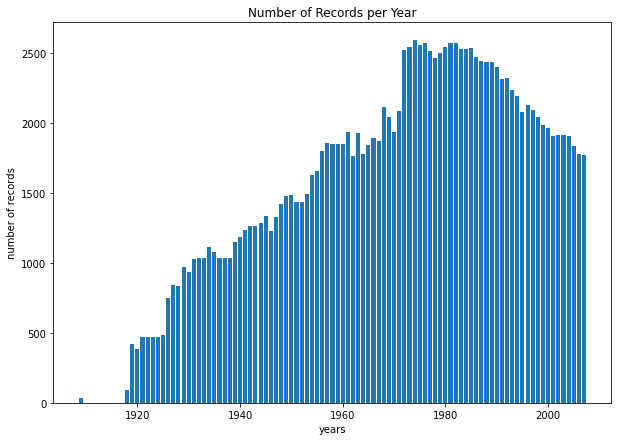

In [ ]:

counts_numpy = numpy.unique(years, return_counts=True)
counts = [counts_numpy[0].tolist(), counts_numpy[1].tolist()]

# Figure Size
fig = plt.figure(figsize =(10, 7))

plt.title("Number of Records per Year")
plt.xlabel("years")
plt.ylabel("number of records")
plt.bar(counts[0], counts[1])
 
# Show Plot
plt.show()


As we can see the number of records per year are somewhat not distributed evenly.

The earlier you go in time, the less records are available.

However, that is not to say that older records are sparse.

Even in the 1920s we can see an average of 500 records per year which is not necessarily that far off from the maximum which is around 2500.

And not that far of from the mean of records per year: 

In [ ]:
print("mean = ", numpy.mean(counts_numpy[1]), "variance = ", numpy.std(counts_numpy[1]))

mean =  1669.142857142857 variance =  670.5760779323502


However, we now have the full justification to get rid of the data points that have a year of 1909 as the number of records associated with this year are vey few compared to other years.

And this is in addition of the previous problems presented on this year.

In [ ]:

indices = df[df["Year"] == 1909].index
df.drop(indices, inplace=True)


## State and State ANSI

We now look at the States and State ANSI columns

## Agricultural District and Agricultural District Code

We will now look and the agricultural district column.

However, before we proceed, we must understand what an agricultural district is.

A district is a logical organisation of land that is genrally under the jurisdiction of a county.

According to the New York state government website, agricultural districts are managed and created by counties, with the guidance of states.

Agricultural districts are therefore, a sub-domain of counties.

This column is quite a complex one since it operates at a finer grain of detail compared to counties (our base line measurment).

Furthuremore, contrary to counties, agricultural districts are highly dependent on local politics and may be created, modified, and destroyed at the whim of local governance.

Therefore, the interpretation of records using this column becomes even more complex when taking into account changes made to those districts.

We will now take a look at the data before continuing our analysis.


In [ ]:

agdistricts = df[["Ag District", "Ag District Code"]]


In [ ]:

unique_districts = agdistricts.groupby(["Ag District", "Ag District Code"]).size().reset_index(name='Freq')
print(unique_districts)


          Ag District  Ag District Code  Freq
0          BLACK BELT                40   336
1          BLACKLANDS                40   993
2           BLUEGRASS                50   532
3             CENTRAL                20   397
4             CENTRAL                30   727
..                ...               ...   ...
104           WESTERN                10   860
105           WESTERN                40   805
106  WESTERN MOUNTAIN                20   156
107       WESTERN RIM                30   612
108         WIREGRASS                60   404

[109 rows x 3 columns]


It seems like the agricultural district and its convening code does not match.

Some districts have the same code while others have two different codes for the same district.

It is not really possible to fix that without looking at the data at large. 

It may be the case that the agricultural district "WESTERN" is duplicated because this name exists in multiple states.

However, what is sure, is that it seems like the agricultural district codes seem to be illogically distributed among records.

The agricultutal district column gives us more information than the code one.

For example, we might be able to extract information like the position of the record within the county or state such as: in the "western" part of the county.

For now, we will keep the ag district code but concentrate on the agricultural districts alone. 

However, we will chose to keep the names that are the same in separate rows as they might actually be separate districts.

In [ ]:

unique_districts = unique_districts[["Ag District", "Freq"]]



We will now proceed to analyze the distribution of records among districts.


In [ ]:

print( "Average number of records per district:", numpy.mean(unique_districts["Freq"]) )
print( "Variance of the frequency of records per district:", numpy.var(unique_districts["Freq"]) )
print( "Max frequency:", numpy.max(unique_districts["Freq"]) )
print( "Min frequency:", numpy.min(unique_districts["Freq"]) )



Average number of records per district: 1392.366972477064
Variance of the frequency of records per district: 7079182.122211933
Max frequency: 16115
Min frequency: 40


As we can see, while the mean seems acceptanle at 1392, the variance is exeptionally high.

This can also be seen in the difference between the max frequency, and the min frequency.

To understand what is happening, let's look at the different quartiles.

In [ ]:
quants = numpy.quantile(unique_districts["Freq"], [0.1, 0.25, 0.5, 0.75, 0.9, 0.95])
print( f"10% of records have a frequency per district less than {quants[0]}" )
print( f"25% of records have a frequency per district less than {quants[1]}" )
print( f"50% of records have a frequency per district less than {quants[2]}" )
print( f"75% of records have a frequency per district less than {quants[3]}" )
print( f"90% of records have a frequency per district less than {quants[4]}" )
print( f"95% of records have a frequency per district less than {quants[5]}" )

10% of records have a frequency per district less than 166.8
25% of records have a frequency per district less than 310.0
50% of records have a frequency per district less than 557.0
75% of records have a frequency per district less than 993.0
90% of records have a frequency per district less than 1971.8000000000006
95% of records have a frequency per district less than 8414.399999999996


As we can see the majority of records per district are heavily skewed towards the lowe side.

While very few have a very large amount of records.

This distribution seems very uneven.

Let us look at this distribution.

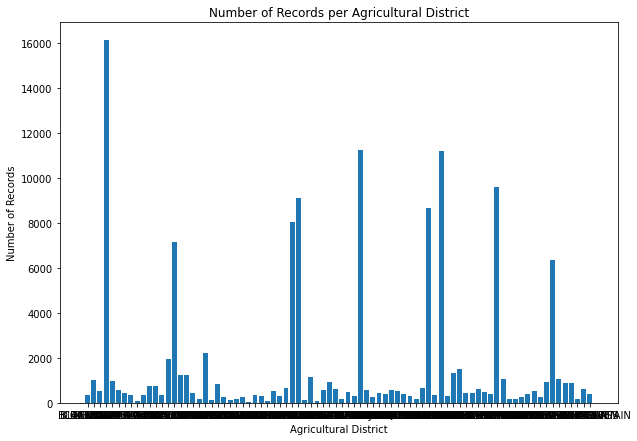

In [ ]:
# Figure Size
fig = plt.figure(figsize =(10, 7))

plt.title("Number of Records per Agricultural District")
plt.xlabel("Agricultural District")
plt.ylabel("Number of Records")
plt.bar(unique_districts["Ag District"], unique_districts["Freq"])
 
# Show Plot
plt.show()

As we can see this distribution is quite uneven.

However, without looking at the full picture, we are unable to make conclusions upon the impact of such a distribution.

We will later analyse those aspects by breaking down this agricultural district column by state counties and years.

This will allow us to understand why there is such a distinct distribution of records.


## Agricultural District vs. Year



We will now start exploring agricultural district in the context of years.

That is, we will first look at the different agricultural districts that are represented in every year.


In [ ]:

agdistANDyear = df[["Ag District", "Ag District Code", "Year"]]


In [ ]:

agdistANDyear = agdistANDyear.groupby(["Ag District", "Ag District Code"]).agg(list).reset_index()
agdistANDyear


,Ag District,Ag District Code,Year
0,BLACK BELT,40,"[1969, 1969, 1969, 1969, 1969, 1969, 1968, 196..."
1,BLACKLANDS,40,"[1969, 1969, 1969, 1969, 1969, 1969, 1969, 196..."
2,BLUEGRASS,50,"[1989, 1989, 1989, 1989, 1989, 1989, 1989, 198..."
3,CENTRAL,20,"[1939, 1939, 1939, 1939, 1939, 1939, 1969, 196..."
4,CENTRAL,30,"[1989, 1989, 1989, 1989, 1989, 1989, 1989, 198..."
...,...,...,...
104,WESTERN,10,"[1939, 1939, 1939, 1939, 1939, 1939, 1939, 193..."
105,WESTERN,40,"[1939, 1939, 1939, 1939, 1939, 1939, 1939, 193..."
106,WESTERN MOUNTAIN,20,"[1989, 1989, 1989, 1989, 1989, 1988, 1988, 198..."
107,WESTERN RIM,30,"[1969, 1969, 1969, 1969, 1969, 1969, 1969, 196..."



As we can see, it seems like not every year is represented per Ag District.

The reasons may be numerous.

Maybe that date was not recorded, or that the district did not exist at the time.

In addition to that, some districts seem to be represented multiple times in the same year.

This should not be the case, and the reason that this is so is not yet clear.

Probably, after analysing the the dataset more, we might be able to answer that question.

For now, we will continue our analysis despite this problem.

Unfortunatly, with so many districts, it would be very difficult to represent them in a graph, however, we will try to do it.


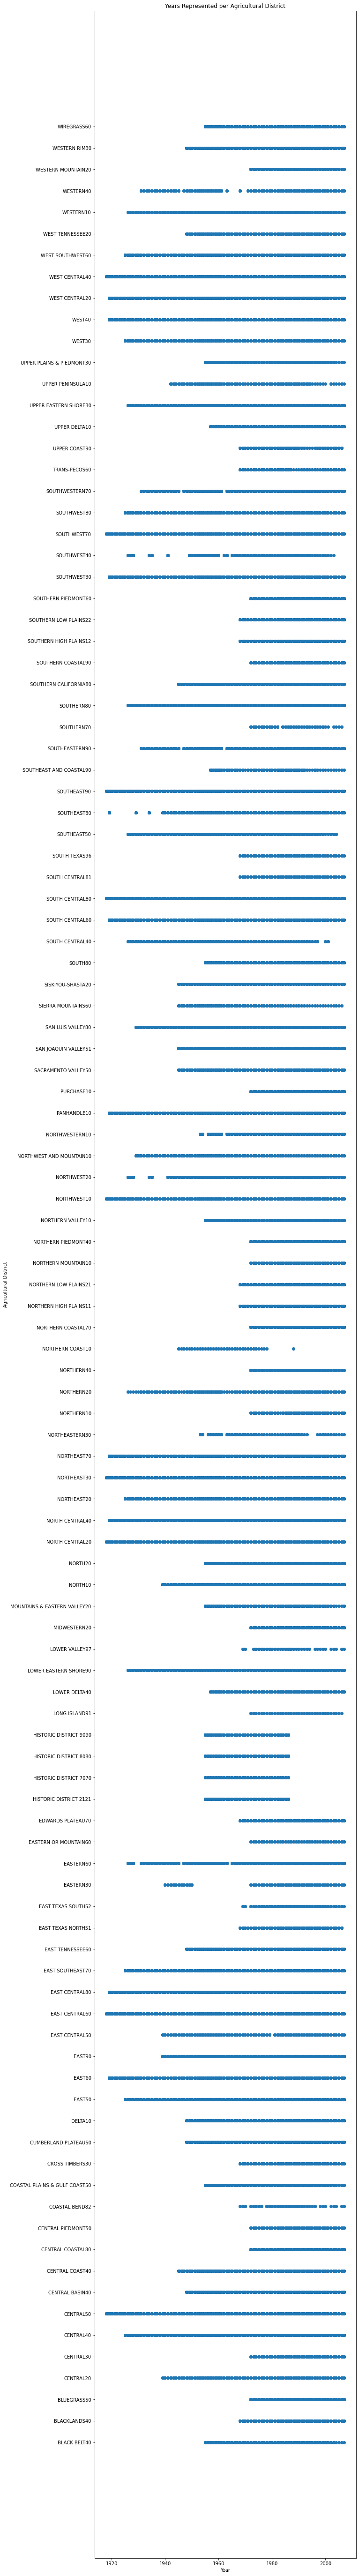

In [ ]:

agdistANDyear["unique name"] = agdistANDyear["Ag District"] + agdistANDyear["Ag District Code"].astype(str)

points = [[], []]
for i in range( len(agdistANDyear) ):
    for j in range( len(agdistANDyear["Year"][i]) ):
        points[0].append(agdistANDyear["unique name"][i])
        points[1].append(agdistANDyear["Year"][i][j])
        
        
fig = plt.figure(figsize =(10, 100))

plt.title("Years Represented per Agricultural District")
plt.xlabel("Year")
plt.ylabel("Agricultural District")
plt.scatter(points[1], points[0])
        
plt.show()



As can be clearly seen from the graph above, there are missing values for the recorded years per district.

However, this is not necessarily critical as most of the values present are continuous within a bounded time slot.




## Value Column

Now let's explore the value column and do preliminary statistical calculations, to get the mean, variance and standard deviation

In [ ]:
value = df['Value']
print(value.head())

0    11.5
1    10.0
2     5.0
3    14.0
4     8.0
Name: Value, dtype: float64
31.28010033444729
15.670065946071434


Mean of Value Column:

In [ ]:
value_mean = value.mean()
print(value_mean)

31.28010033444729


Median of Value Column:

In [ ]:
value_median = value.median()
print(value_median)

29.2


In [ ]:
value_mode = value.mode()
print(value_mode)

0    30.0
dtype: float64


Standard Deviation of Value column:

In [ ]:
value_std = value.std()
print(value_std)

15.670065946071434


Variance of Value column:

In [ ]:
value_variance = value_std*value_std
print(value_variance)

245.55096675422763


Max of Value column:

In [ ]:
value_max = value.max()
print(value_max)

127.8


Min of Value Column - count how many zeros do we have, see what state and county, might be an error, or in an area not suitable for wheat plantation (also maybe fire, or something major that happened)

In [ ]:
value_min = value.min()
print(value_min)

0.0


Range of Value column:

In [ ]:
value_range = value_max - value_min
print(value_range)

127.8


Statistical Summary of the Value column:

In [ ]:
value.describe()

count    151892.000000
mean         31.280100
std          15.670066
min           0.000000
25%          20.000000
50%          29.200000
75%          39.500000
max         127.800000
Name: Value, dtype: float64

Boxplot of Value column:

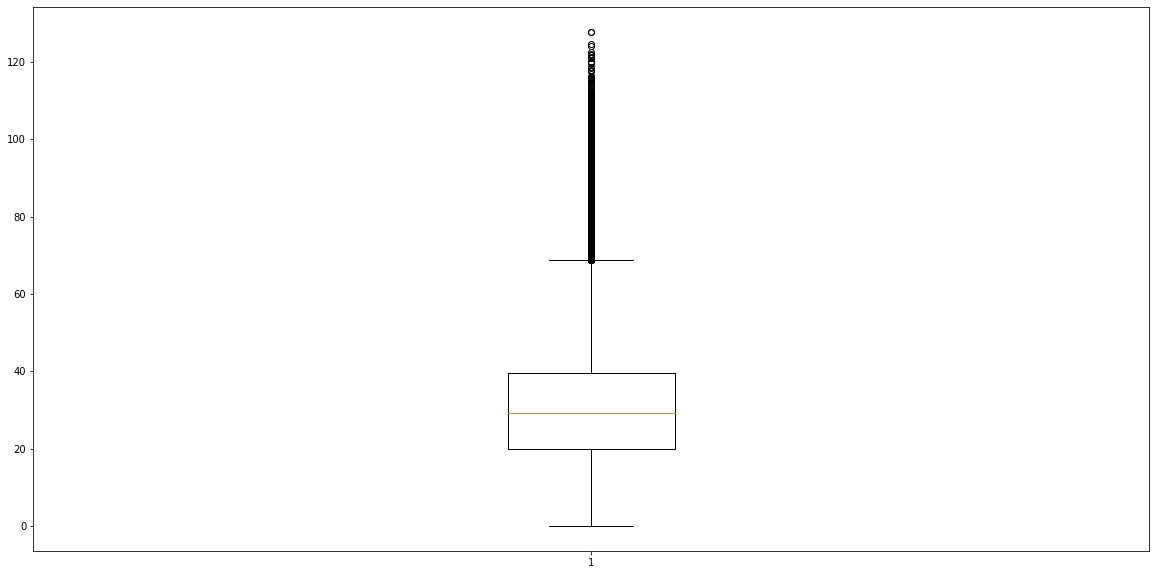

In [ ]:
fig = plt.figure(figsize =(20, 10))
 
# Creating plot
plt.boxplot(value)
 
# show plot
plt.show()

We can tell the minimum value is 0.0, which means there is no yield or 0 yield in that area, whereas the maximum is 127.8. Around 50% of the data has yield between almost 20 and 40.The interquartile range is around 20. (will get more precise numbers soon)

Now let's build a histogram to check the distribution of the data:

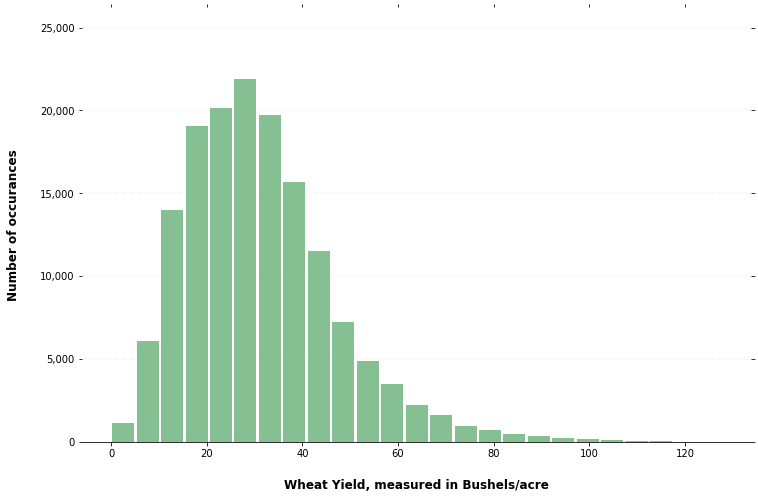

In [ ]:
from matplotlib.ticker import StrMethodFormatter

ax = df.hist(column='Value', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("Wheat Yield, measured in Bushels/acre", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Number of occurances", labelpad=20, weight='bold', size=12)

    
    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

We can tell the data is right skewed and it is obviously not a normal distribution.

#Value per State

First, let's get the mean yield per state

In [ ]:
df[["State", "Value"]].groupby("State").mean()

,Value
State,
ALABAMA,29.274411
ARIZONA,69.998210
ARKANSAS,34.496612
CALIFORNIA,41.596199
COLORADO,27.161566
DELAWARE,34.964228
FLORIDA,26.278195
GEORGIA,31.575780
IDAHO,50.326037


Median wheat yield in every state

In [ ]:
df[["State", "Value"]].groupby("State").median()

,Value
State,
ALABAMA,27.00
ARIZONA,71.10
ARKANSAS,33.00
CALIFORNIA,33.00
COLORADO,23.00
DELAWARE,32.15
FLORIDA,25.00
GEORGIA,30.00
IDAHO,44.90


Standard deviation of wheat yield in every state

In [ ]:
df[["State", "Value"]].groupby("State").std()

,Value
State,
ALABAMA,9.693747
ARIZONA,23.112121
ARKANSAS,10.983720
CALIFORNIA,23.967205
COLORADO,18.208310
DELAWARE,16.733235
FLORIDA,7.632980
GEORGIA,10.269812
IDAHO,24.565693


Maximum wheat yield per state
do per year per county
on y axis: yield, x : years, and have 1 line per county or 1 line per state and we can plot that, we can have a visulization per state, this tell us if the wheat production improved over the years. 

In [ ]:
df[["State", "Value"]].groupby("State").max()

,Value
State,
ALABAMA,76.0
ARIZONA,115.3
ARKANSAS,74.0
CALIFORNIA,110.0
COLORADO,116.5
DELAWARE,75.5
FLORIDA,56.6
GEORGIA,70.0
IDAHO,127.8


Minimum wheat yield per state
get the number of zeroes in every state, or it is an NA, when the value was not provided 

In [ ]:
df[["State", "Value"]].groupby("State").min()

,Value
State,
ALABAMA,0.0
ARIZONA,0.0
ARKANSAS,0.0
CALIFORNIA,0.0
COLORADO,0.0
DELAWARE,10.9
FLORIDA,0.0
GEORGIA,10.0
IDAHO,7.9
